In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import time
import joblib

In [57]:
filepath = "iot23_combined.csv"
df = pd.read_csv(filepath)

In [58]:
df

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
1,1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
2,2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
3,3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,...,False,False,False,True,False,False,False,False,False,False
4,4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,99994,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
1444670,99995,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
1444671,99996,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False
1444672,99997,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,False,False,False,True,False,False,False,False,False,False


In [59]:
# Remove unnamed column if exists
if 'Unnamed: 0' in df.columns:
    del df['Unnamed: 0']

In [60]:
# Display first few rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False


In [61]:
# Basic dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444674 entries, 0 to 1444673
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   duration           1444674 non-null  float64
 1   orig_bytes         1444674 non-null  int64  
 2   resp_bytes         1444674 non-null  int64  
 3   missed_bytes       1444674 non-null  float64
 4   orig_pkts          1444674 non-null  float64
 5   orig_ip_bytes      1444674 non-null  float64
 6   resp_pkts          1444674 non-null  float64
 7   resp_ip_bytes      1444674 non-null  float64
 8   label              1444674 non-null  object 
 9   proto_icmp         1444674 non-null  bool   
 10  proto_tcp          1444674 non-null  bool   
 11  proto_udp          1444674 non-null  bool   
 12  conn_state_OTH     1444674 non-null  bool   
 13  conn_state_REJ     1444674 non-null  bool   
 14  conn_state_RSTO    1444674 non-null  bool   
 15  conn_state_

In [62]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
duration             0
orig_bytes           0
resp_bytes           0
missed_bytes         0
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
label                0
proto_icmp           0
proto_tcp            0
proto_udp            0
conn_state_OTH       0
conn_state_REJ       0
conn_state_RSTO      0
conn_state_RSTOS0    0
conn_state_RSTR      0
conn_state_RSTRH     0
conn_state_S0        0
conn_state_S1        0
conn_state_S2        0
conn_state_S3        0
conn_state_SF        0
conn_state_SH        0
conn_state_SHR       0
dtype: int64


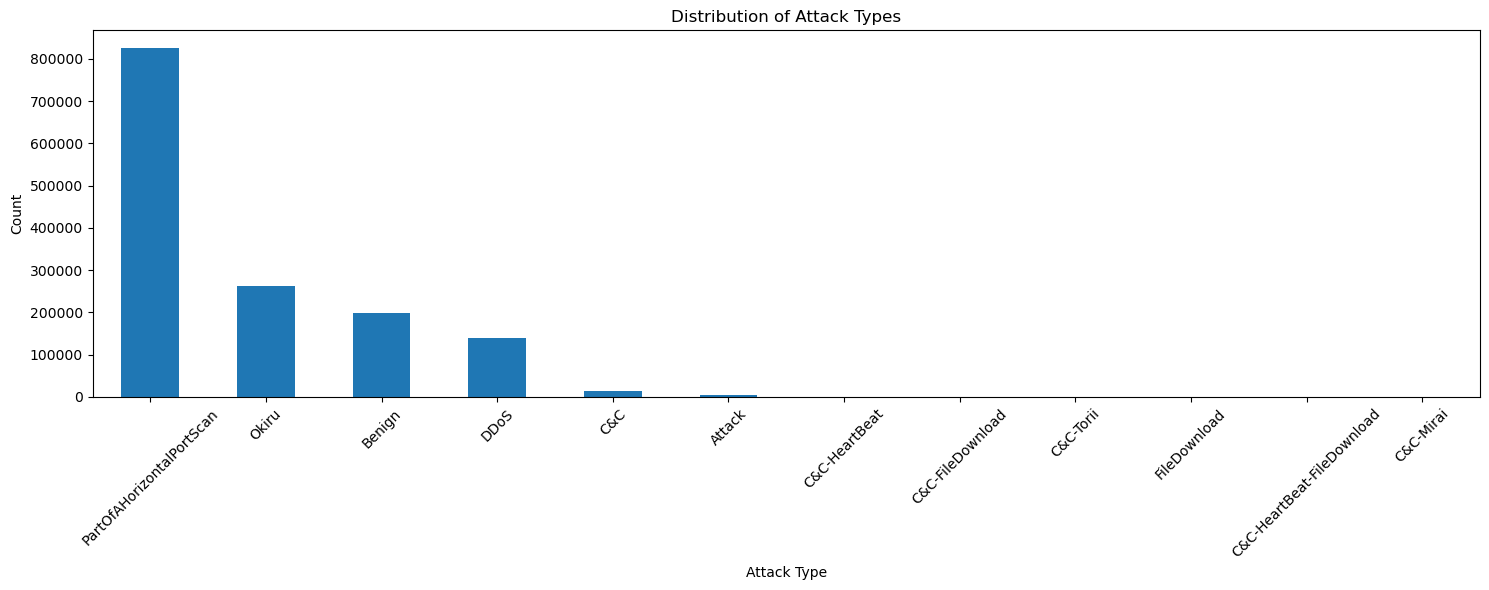

In [63]:
# Analyze attack distribution
plt.figure(figsize=(15, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
print("\nClass Distribution:")
print(df['label'].value_counts())
print("\nClass Distribution (%):")
print(df['label'].value_counts(normalize=True) * 100)


Class Distribution:
label
PartOfAHorizontalPortScan     825939
Okiru                         262690
Benign                        197809
DDoS                          138777
C&C                            15100
Attack                          3915
C&C-HeartBeat                    349
C&C-FileDownload                  43
C&C-Torii                         30
FileDownload                      13
C&C-HeartBeat-FileDownload         8
C&C-Mirai                          1
Name: count, dtype: int64

Class Distribution (%):
label
PartOfAHorizontalPortScan     57.171306
Okiru                         18.183341
Benign                        13.692293
DDoS                           9.606112
C&C                            1.045219
Attack                         0.270995
C&C-HeartBeat                  0.024158
C&C-FileDownload               0.002976
C&C-Torii                      0.002077
FileDownload                   0.000900
C&C-HeartBeat-FileDownload     0.000554
C&C-Mirai                      0

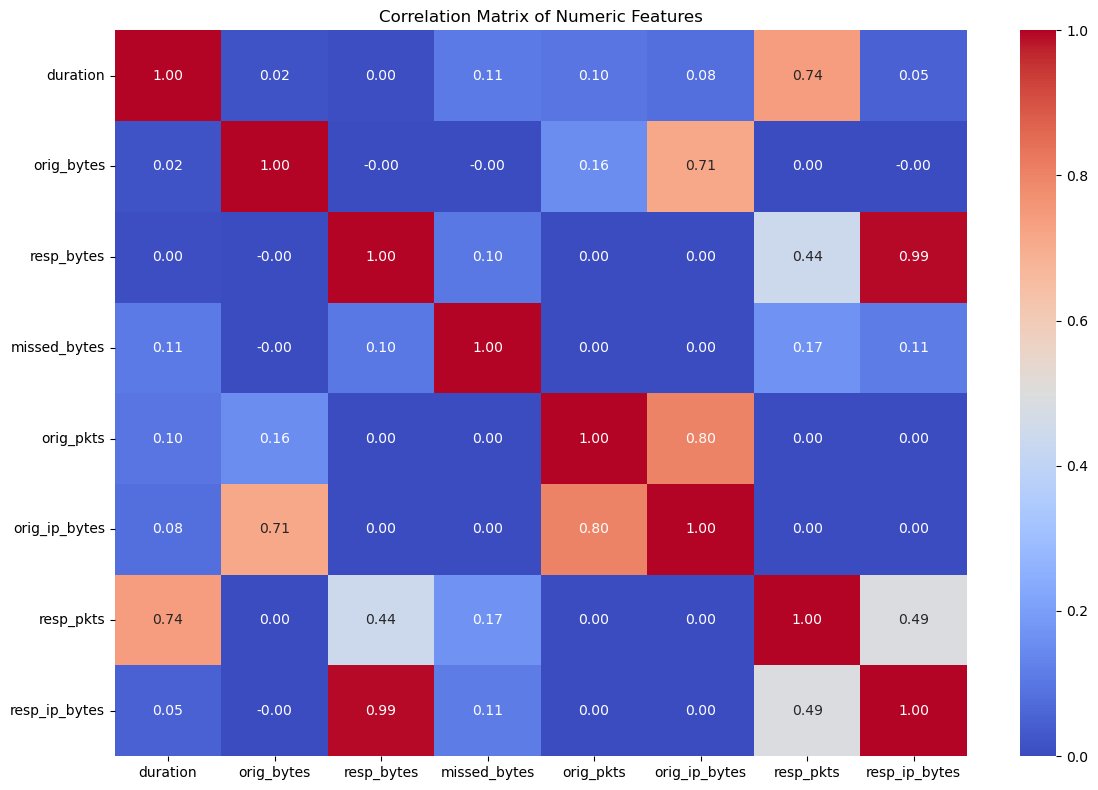

In [65]:
# Correlation analysis for numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

In [66]:
# Prepare features
features = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 
           'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 
           'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 
           'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 
           'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 
           'conn_state_SH', 'conn_state_SHR']

X = df[features].values
Y = pd.get_dummies(df['label']).values

print("Features shape:", X.shape)
print("Labels shape:", Y.shape)

Features shape: (1444674, 24)
Labels shape: (1444674, 12)


In [67]:
# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [68]:
# Save scaler for future use
joblib.dump(scaler, 'iot23_scaler.pkl')

['iot23_scaler.pkl']

In [69]:
# Analyze normalized data
print("Feature Statistics after Normalization:")
print(pd.DataFrame(X_normalized, columns=features).describe())

Feature Statistics after Normalization:
           duration    orig_bytes    resp_bytes  missed_bytes     orig_pkts  \
count  1.444674e+06  1.444674e+06  1.444674e+06  1.444674e+06  1.444674e+06   
mean   2.666679e-05  1.562468e-06  1.630457e-06  9.812838e-06  2.696624e-06   
std    1.749454e-03  9.827677e-04  8.341449e-04  2.092529e-03  1.095064e-03   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.514524e-08   
50%    2.041741e-05  5.731216e-10  8.575582e-08  0.000000e+00  1.514524e-08   
75%    2.041741e-05  5.731216e-10  8.575582e-08  0.000000e+00  3.029048e-08   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

       orig_ip_bytes     resp_pkts  resp_ip_bytes    proto_icmp     proto_tcp  \
count   1.444674e+06  1.444674e+06   1.444674e+06  1.444674e+06  1.444674e+06   
mean    4.045097e-06  1.351440e-05   2.356581e-06  2.527214e-03  9.603558e-01   
std  

In [70]:
X.shape

(1444674, 24)

In [71]:
Y = pd.get_dummies(df['label']).values

In [72]:
Y.shape

(1444674, 12)

In [73]:
#X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S0', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SF', 'conn_state_SH', 'conn_state_SHR']]
#Y = df[['label']]

In [74]:
X

array([[2.998796, 0, 0, ..., False, False, False],
       [0.0, 0, 0, ..., False, False, False],
       [0.0, 0, 0, ..., False, False, False],
       ...,
       [0.0, 0, 0, ..., False, False, False],
       [0.0, 0, 0, ..., False, False, False],
       [0.0, 0, 0, ..., False, False, False]], dtype=object)

In [75]:
df

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_icmp,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
1444670,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
1444671,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False
1444672,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,False,...,False,False,False,True,False,False,False,False,False,False


In [76]:
X_normalized

array([[8.16450401e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.04174057e-05, 5.73121586e-10, 8.57558209e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [77]:
X_normalized.shape

(1444674, 24)

In [83]:
scaler.fit(Y)

MinMaxScaler()

In [84]:
Y_normalized= scaler.transform(Y)

In [85]:
Y_normalized

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

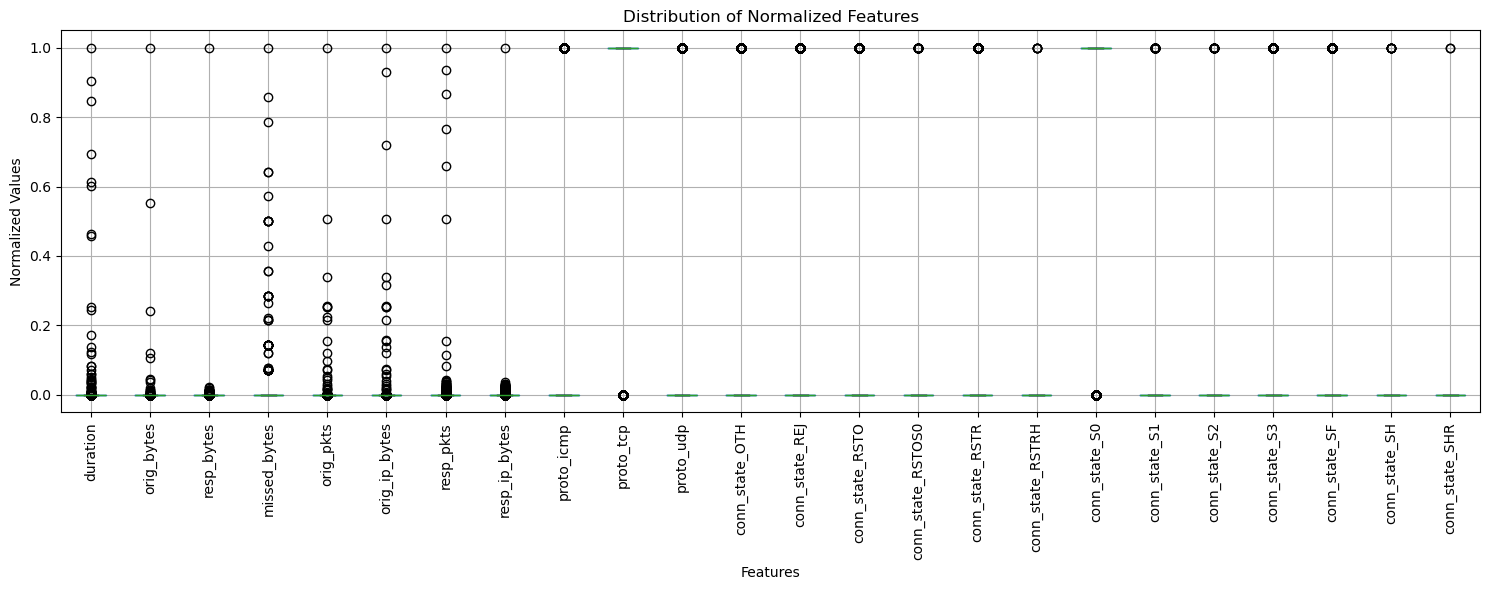

In [86]:
# Visualize normalized features
plt.figure(figsize=(15, 6))
pd.DataFrame(X_normalized, columns=features).boxplot()
plt.title('Distribution of Normalized Features')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [87]:
# Reshape data for CNN
X_reshaped = X_normalized.reshape((X_normalized.shape[0], X_normalized.shape[1], 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, Y, 
                                                    random_state=10, 
                                                    test_size=0.2)



In [88]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1155739, 24, 1)
Testing set shape: (288935, 24, 1)


In [89]:
# Define CNN model
def create_model():
    model = Sequential()
    
    # Convolutional layers
    model.add(Conv1D(32, 3, padding="same", activation="relu", 
                    input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.5))
    model.add(Conv1D(64, 3, padding="same", activation="relu"))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.5))
    
    # Dense layers
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(y_train.shape[1], activation="softmax"))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    
    return model

In [90]:
# Create model
model = create_model()
model.summary()

C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 24, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 24, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │         3,084 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,284 (805.80 KB)

 Trainable params: 206,284 (805.80 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# Create checkpoint callback
checkpoint_path = "iot23_model_CNN_v1.keras"
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


In [92]:
# Train model
start_time = time.time()
history = model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=256,
                   validation_data=(X_test, y_test),
                   callbacks=[checkpoint],
                   verbose=1)
training_time = time.time() - start_time

Epoch 1/50
4511/4515 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6844 - loss: 0.9079
Epoch 1: val_accuracy improved from -inf to 0.69339, saving model to iot23_model_CNN_v1.keras
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 29s 6ms/step - accuracy: 0.6844 - loss: 0.9079 - val_accuracy: 0.6934 - val_loss: 0.8625
Epoch 2/50
4507/4515 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6937 - loss: 0.8611
Epoch 2: val_accuracy improved from 0.69339 to 0.69341, saving model to iot23_model_CNN_v1.keras
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.6937 - loss: 0.8611 - val_accuracy: 0.6934 - val_loss: 0.8607
Epoch 3/50
4509/4515 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6926 - loss: 0.8617
Epoch 3: val_accuracy did not improve from 0.69341
4515/4515 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.6926 - loss: 0.8617 - val_accuracy: 0.6934 - val_loss: 0.8608
Epoch 4/50
4507/4515 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6946 - loss: 0.8581
Epoch 4: val_accuracy did not improve from 0.6

In [93]:
# Save final model
model.save('iot23_final_model_CNN_v1.keras')

print(f"\nTraining Time: {training_time:.2f} seconds")


Training Time: 1389.85 seconds


In [94]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.6934
Test Loss: 0.8606


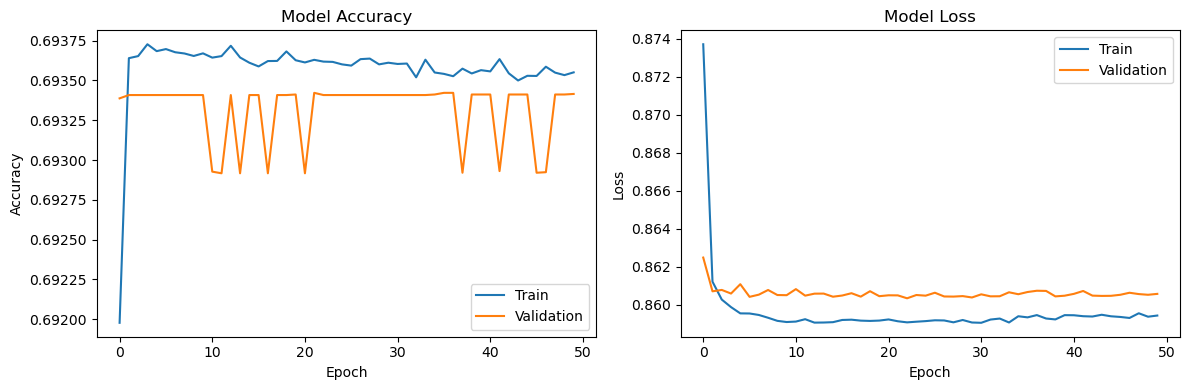

In [95]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

In [96]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


9030/9030 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


In [97]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

Classification Report:


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.74      0.97      0.84       798
           1       0.98      0.30      0.46     39535
           2       0.65      0.10      0.18      3102
           3       1.00      0.22      0.36         9
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         7
           8       1.00      0.82      0.90     27856
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00     52607
          11       0.65      1.00      0.79    164946

    accuracy                           0.69    288935
   macro avg       0.46      0.31      0.32    288935
weighted avg       0.61      0.69      0.60    288935



C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


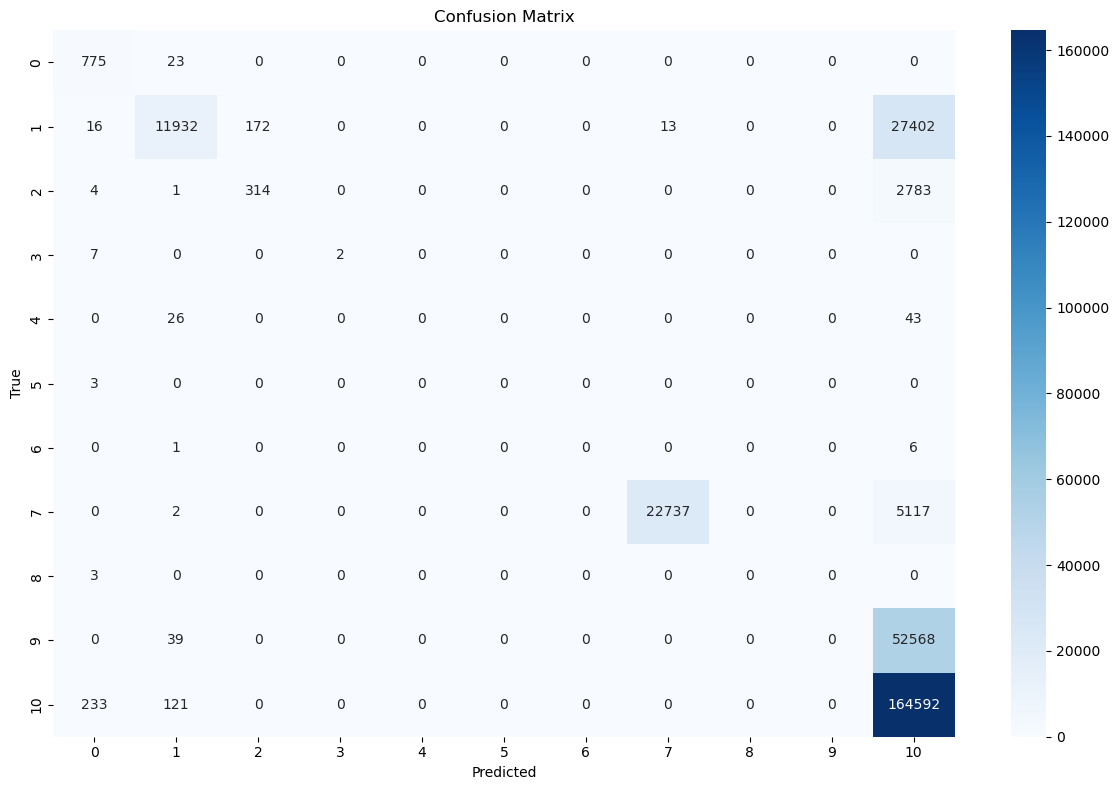

In [98]:
# Confusion matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [99]:
def load_model_and_predict(data):
    """
    Load saved model and make predictions on new data
    """
    # Load model and scaler
    model = tf.keras.models.load_model('iot23_final_model_CNN_v1.keras')
    scaler = joblib.load('iot23_scaler.pkl')
    
    # Preprocess data
    data_normalized = scaler.transform(data)
    data_reshaped = data_normalized.reshape((data_normalized.shape[0], 
                                           data_normalized.shape[1], 1))
    
    # Make predictions
    predictions = model.predict(data_reshaped)
    predicted_classes = np.argmax(predictions, axis=1)
    
    return predicted_classes, predictions

# Demo with sample data
sample_data = X[:5]  # Take first 5 samples
predicted_classes, predictions = load_model_and_predict(sample_data)
print("Predicted classes for sample data:", predicted_classes)
print("\nPrediction probabilities:")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted classes for sample data: [11 11 11 11 11]

Prediction probabilities:
[[1.32108852e-10 1.10610515e-01 1.05845612e-02 3.01060264e-15
  1.39178606e-04 3.65354129e-17 1.75637110e-14 1.00060861e-05
  2.01685838e-02 1.33781392e-14 2.09813476e-01 6.48673713e-01]
 [1.32108852e-10 1.10610515e-01 1.05845612e-02 3.01060264e-15
  1.39178606e-04 3.65354129e-17 1.75637110e-14 1.00060861e-05
  2.01685838e-02 1.33781392e-14 2.09813476e-01 6.48673713e-01]
 [1.32108852e-10 1.10610515e-01 1.05845612e-02 3.01060264e-15
  1.39178606e-04 3.65354129e-17 1.75637110e-14 1.00060861e-05
  2.01685838e-02 1.33781392e-14 2.09813476e-01 6.48673713e-01]
 [1.32108852e-10 1.10610515e-01 1.05845612e-02 3.01060264e-15
  1.39178606e-04 3.65354129e-17 1.75637110e-14 1.00060861e-05
  2.01685838e-02 1.33781392e-14 2.09813476e-01 6.48673713e-01]
 [1.32108852e-10 1.10610515e-01 1.05845612e-02 3.01060264e-15
  1.39178606e-04 3.65354129e-17 1.75637110e-14 1.00060861e-05
  2.016858